# Comparing CKS ages with gyro ages.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import teff_bv as tbv
%matplotlib inline

plotpar = {'axes.labelsize': 18,
           'text.fontsize': 10,
           'legend.fontsize': 18,
           'xtick.labelsize': 18,
           'ytick.labelsize': 18,
           'text.usetex': True}
plt.rcParams.update(plotpar)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The Gyro function:

In [100]:
def g_age(par, period, bv):
    bvc = a*(bv - c)**b
    return (period/bvc)**(1./n) * 1e-3

Test the gyro function...

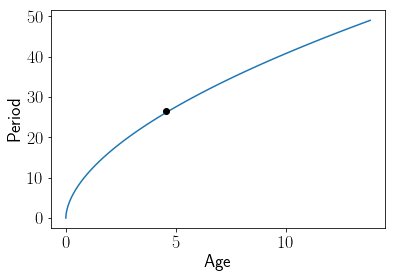

In [101]:
a, b, n, c = .407, .325, .566, .495  # MH
par = [a, b, n, c]
periods = np.arange(0, 50)
bvs = np.ones_like(periods)*.65
ages = g_age(par, periods, bvs)
plt.plot(ages, periods)
plt.plot(4.567, 26.5, "ko")
plt.xlabel("Age")
plt.ylabel("Period")

Load the data and merge on KOI number...

In [102]:
my = pd.read_csv("data/koi_periods_0712.csv")
df = pd.read_csv("data/cks_physical_merged.csv")

In [103]:
id_starname = []
for koi in my.KOI.values:
    id_starname.append("K{}".format(str(koi).zfill(5)))
my["id_starname"] = id_starname
new = pd.merge(my, df, on="id_starname", how="inner")

Calculate B-V and cut on B-V > .4 (Teff~6250)

In [104]:
bvs = tbv.teff2bv(new.teff.values, new.logg.values, new.iso_smet.values)
new["bv"] = bvs
m = bvs > c
cool = new.iloc[m]

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


Calculate gyro ages:

In [105]:
gyro_age = g_age(par, cool.period.values, cool.bv.values)
cool["gyro_age"] = gyro_age

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Plot Ages in linear space:

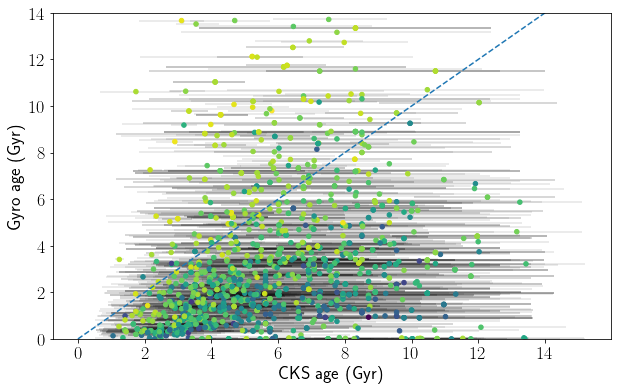

In [114]:
fig = plt.figure(figsize=(10, 6))
plt.errorbar(cool.iso_sage, cool.gyro_age, xerr=[-cool.iso_sage_err2, cool.iso_sage_err1],
             fmt="k.", alpha=.1, zorder=0)
plt.scatter(cool.iso_sage, cool.gyro_age, c=cool.teff.values, s=20, zorder=1)
#plt.colorbar("$T_{\mathrm{eff}}$")
xs = np.linspace(0, 14, 100)
plt.plot(xs, xs, "--")
plt.xlabel("CKS age (Gyr)")
plt.ylabel("Gyro age (Gyr)")
plt.ylim(0,  14)
plt.savefig("cks_vs_gyro")

Plot in log space:

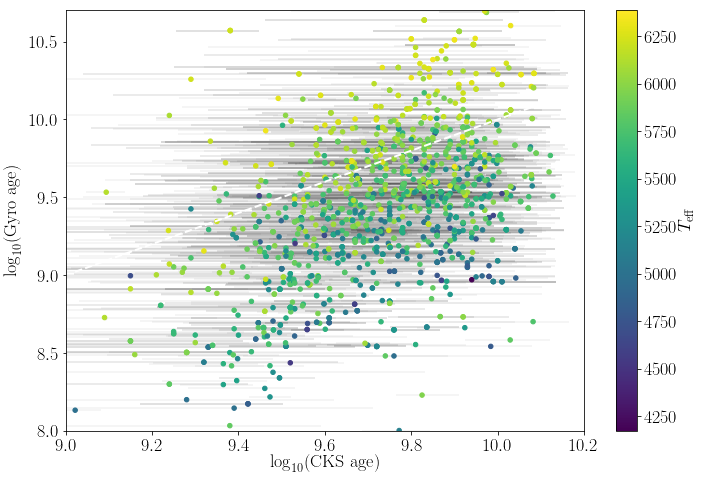

In [115]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(cool.iso_slogage, np.log10(cool.gyro_age*1e9), xerr=[-cool.iso_slogage_err2, cool.iso_slogage_err1], 
             fmt="k.", alpha=.05, zorder=0)
plt.scatter(cool.iso_slogage, np.log10(cool.gyro_age*1e9), c=cool.teff, s=20, zorder=1)
plt.colorbar(label="$T_{\mathrm{eff}}$")
xs = np.linspace(min(cool.iso_slogage), max(cool.iso_slogage), 100)
plt.plot(xs, xs, "w--", lw=2)
plt.xlabel("$\log_{10}(\mathrm{CKS~age})$")
plt.ylabel("$\log_{10}(\mathrm{Gyro~age})$")
plt.subplots_adjust(left=.15, bottom=.15)
plt.ylim(8, 10.7)
plt.xlim(9, 10.2)
plt.savefig("log_cks_vs_gyro.pdf")

Check for subgiants: colour by logg:

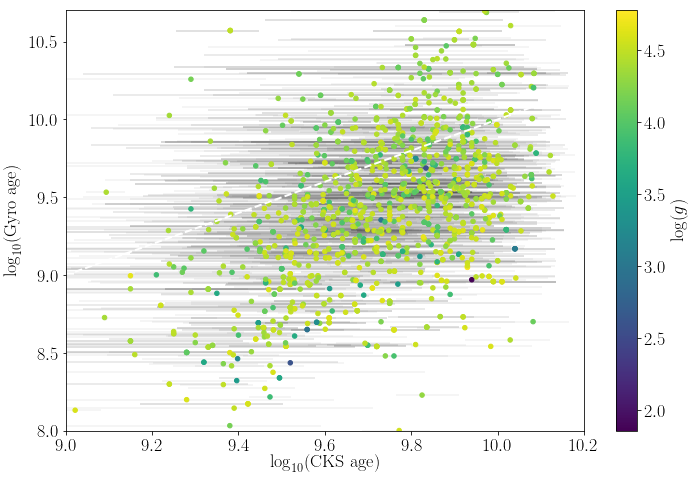

In [116]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(cool.iso_slogage, np.log10(cool.gyro_age*1e9), xerr=[-cool.iso_slogage_err2, cool.iso_slogage_err1], 
             fmt="k.", alpha=.05, zorder=0)
plt.scatter(cool.iso_slogage, np.log10(cool.gyro_age*1e9), c=cool.logg, s=20, zorder=1)
plt.colorbar(label="$\log(g)$")
xs = np.linspace(min(cool.iso_slogage), max(cool.iso_slogage), 100)
plt.plot(xs, xs, "w--", lw=2)
plt.xlabel("$\log_{10}(\mathrm{CKS~age})$")
plt.ylabel("$\log_{10}(\mathrm{Gyro~age})$")
plt.subplots_adjust(left=.15, bottom=.15)
plt.ylim(8, 10.7)
plt.xlim(9, 10.2)
plt.savefig("log_cks_vs_gyro.pdf")

It looks like there are a few evolved stars in the sample. Cut these out:

In [117]:
m = cool.logg.values > 4.2
nosubs = cool.iloc[m]

Make main plot again without the subgiants and giants.

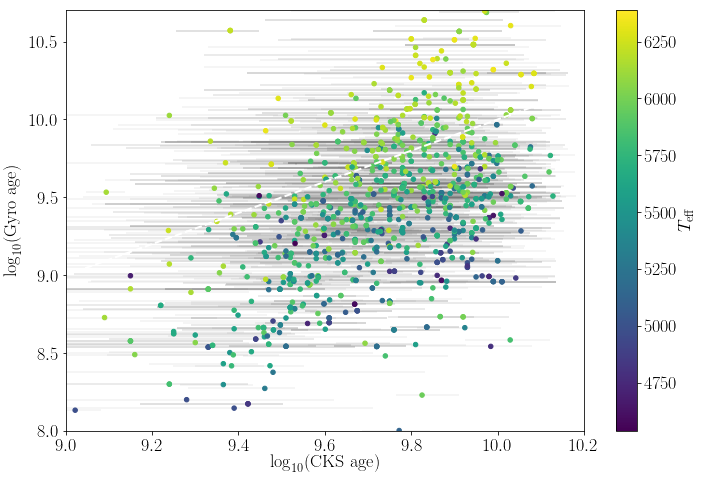

In [118]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(nosubs.iso_slogage, np.log10(nosubs.gyro_age*1e9), 
             xerr=[-nosubs.iso_slogage_err2, nosubs.iso_slogage_err1], fmt="k.", alpha=.05, zorder=0)
plt.scatter(nosubs.iso_slogage, np.log10(nosubs.gyro_age*1e9), c=nosubs.teff, s=20, zorder=1)
plt.colorbar(label="$T_{\mathrm{eff}}$")
xs = np.linspace(min(nosubs.iso_slogage), max(nosubs.iso_slogage), 100)
plt.plot(xs, xs, "w--", lw=2)
plt.xlabel("$\log_{10}(\mathrm{CKS~age})$")
plt.ylabel("$\log_{10}(\mathrm{Gyro~age})$")
plt.subplots_adjust(left=.15, bottom=.15)
plt.ylim(8, 10.7)
plt.xlim(9, 10.2)
plt.savefig("log_cks_vs_gyro.pdf")

Well that seems like it made it worse...

Colour by metallicity?

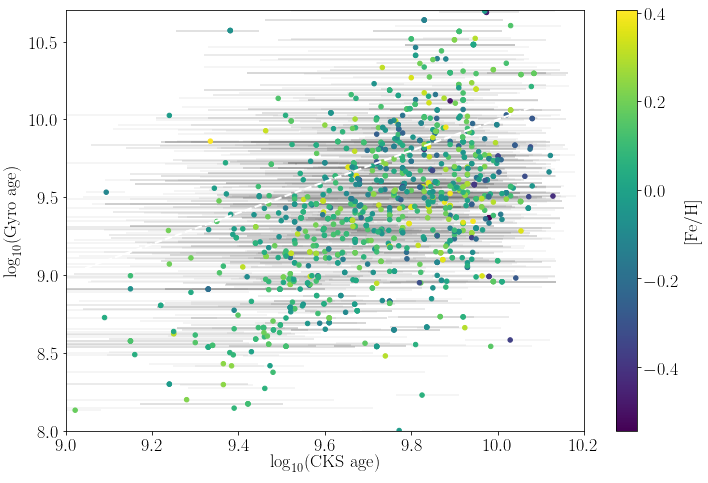

In [119]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(nosubs.iso_slogage, np.log10(nosubs.gyro_age*1e9), 
             xerr=[-nosubs.iso_slogage_err2, nosubs.iso_slogage_err1], fmt="k.", alpha=.05, zorder=0)
plt.scatter(nosubs.iso_slogage, np.log10(nosubs.gyro_age*1e9), c=nosubs.iso_smet, s=20, zorder=1)
plt.colorbar(label="$[\mathrm{Fe}/\mathrm{H}]$")
xs = np.linspace(min(nosubs.iso_slogage), max(nosubs.iso_slogage), 100)
plt.plot(xs, xs, "w--", lw=2)
plt.xlabel("$\log_{10}(\mathrm{CKS~age})$")
plt.ylabel("$\log_{10}(\mathrm{Gyro~age})$")
plt.subplots_adjust(left=.15, bottom=.15)
plt.ylim(8, 10.7)
plt.xlim(9, 10.2)
plt.savefig("log_cks_vs_gyro.pdf")